### Student Information
Name:Nykole Edward 

Student ID:108065438

GitHub ID:NykoleEdward

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [3]:
### Begin Assignment Here
import pandas as pd

##Converted the txt files to a csv file using microsoft excel then read data set into here
df1 = pd.read_csv (r'C:\Users\student\Documents\NTHU\Data\DM19-Lab1-Homework1\amazon.csv')
df2 = pd.read_csv(r'C:\Users\student\Documents\NTHU\Data\DM19-Lab1-Homework1\Yelp.csv')
df3 = pd.read_csv(r'C:\Users\student\Documents\NTHU\Data\DM19-Lab1-Homework1\imdb.csv')
frames = [df1, df2, df3]
#used concatenating to merge data frames into one 
result = pd.concat(frames)
print (result)


                                              Sentence  Score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
743  I just got bored watching Jessice Lange take h...      0
744  Unfortunately, any virtue in this film's produ...      0
745                   In a word, it is embarrassing.        0
746                               Exceptionally bad!        0
747  All in all its an insult to one's intelligence...      0

[2748 rows x 2 columns]


In [4]:
##Sample record in dataset 
result[0:1]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0


In [5]:
from sklearn import datasets 

##Found total length of dataset 
len(result)

2748

In [6]:
#printing a set of samples in the data set 
for t in result[:3]:
    print(result[t])

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: Sentence, Length: 2748, dtype: object
0      0
1      1
2      1
3      0
4      1
      ..
743    0
744    0
745    0
746    0
747    0
Name: Score, Length: 2748, dtype: int64


In [7]:
#Performing a simple query
result[0:10][["Sentence", "Score"]]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [8]:
#Performing a query on the last ten records 
result[-10:]

,Sentence,Score
738,"The opening sequence of this gem is a classic,...",1
739,Fans of the genre will be in heaven.,1
740,Lange had become a great actress.,1
741,It looked like a wonderful story.,1
742,I never walked out of a movie faster.,0
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0
747,All in all its an insult to one's intelligence...,0


In [9]:
#Performing a query using loc by position for every tenth record in the data set 
result.iloc[::10, 0:2][0:10]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [10]:
#Performing a query using loc by label for every tenth record 
result.loc[::10, 'Sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: Sentence, dtype: object

In [11]:
#Performing a standard query 
result[::10][0:10]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [12]:
#Experimenting with other querying techniques -NOT WORKING
#import pandas as pd
#result = pd.DataFrame({'Sentence': range(1, 500),
                   #'Score': range(10, 0, -2)})
#result.query('Sentence > Score')

In [13]:
#INCOMPLETE
#Fetching records from the Score column and fetching every tenth record but displaying the first five 
result.loc[lambda f: f.Score == '1'].iloc[::10, :][:5]

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Sentence,Score


In [14]:
#Checking if there are any missing values in dataset 
import helpers.data_mining_helpers as dmh
result.isnull()
result.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [15]:
#checking for duplicate data 
result.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 2748, dtype: bool

In [16]:
#Trying Bernoulli naive Bayes that expects a binary feature vector
from sklearn.datasets import make_classification
nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [17]:
#Attempting the binary classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8666666666666667

In [18]:
#Building a stop words list
def get_stop_words(self):
    return _check_stop_list(self.stop_words)

In [19]:
#Finding out how many records have a value of 1 as opposed to 0 
print(result.Score.value_counts())

1    1386
0    1362
Name: Score, dtype: int64


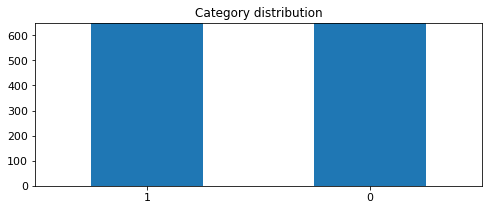

In [42]:
#Bar graph to show visualization of counts on the score column 
result.Score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [43]:
#creating a sample size of the dataframe
sample=result.sample(n=500)
print (sample)

                                              Sentence  Score  \
454  I've also had problems with the phone reading ...      0   
271                                  Worked perfectly!      1   
10                     And the sound quality is great.      1   
538  The eargels channel the sound directly into yo...      1   
378                   RUDE & INCONSIDERATE MANAGEMENT.      0   
..                                                 ...    ...   
289  This item is great, installed it, let it charg...      1   
520  Top line: Don't waste your time and money on t...      0   
270  I knew when I saw the film that more great thi...      1   
176  If you see it, you should probably just leave ...      0   
773          What did bother me, was the slow service.      0   

                                              unigrams  
454  [I, 've, also, had, problems, with, the, phone...  
271                             [Worked, perfectly, !]  
10            [And, the, sound, quality, is, gre

In [22]:
print(sample.Sentence.value_counts())


Does not fit.                                                                                                                                                                                   2
This is a great deal.                                                                                                                                                                           2
The cast is always entertaining as usual.                                                                                                                                                       1
Not my thing.                                                                                                                                                                                   1
It's been my choice headset for years.Great sound; good volume; good noise cancellation.                                                                                                        1
                              

In [24]:
#feature creation using unigrams 
import nltk
nltk.download('punkt')
result['unigrams'] = result['Sentence'].apply(lambda x: dmh.tokenize_text(x))
result[0:100]["unigrams"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     [So, there, is, no, way, for, me, to, plug, it...
1                  [Good, case, ,, Excellent, value, .]
2                         [Great, for, the, jawbone, .]
3     [Tied, to, charger, for, conversations, lastin...
4                              [The, mic, is, great, .]
                            ...                        
95                  [Will, order, from, them, again, !]
96    [If, you, plan, to, use, this, in, a, car, for...
97    [I, found, this, product, to, be, waaay, too, ...
98    [Best, I, 've, found, so, far, ..., ., I, 've,...
99    [I, 'm, very, disappointed, with, my, decision...
Name: unigrams, Length: 100, dtype: object

In [ ]:
#list(sample[0:1]['unigrams'])

In [44]:
#attempting a feature extraction 
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sample_counts = count_vect.fit_transform(sample.Sentence)

In [45]:
analyze = count_vect.build_analyzer()
analyze("sample")

['sample']

In [46]:
#Analyzing first record of dataframe
analyze(" ".join(list(sample[:1].Sentence)))

['ve',
 'also',
 'had',
 'problems',
 'with',
 'the',
 'phone',
 'reading',
 'the',
 'memory',
 'card',
 'in',
 'which',
 'always',
 'turn',
 'it',
 'on',
 'and',
 'then',
 'off',
 'again']

In [47]:
#identifying matrix of dataframe
sample_counts.shape

(500, 1847)

In [48]:
#finding feature names of the vectorizer
count_vect.get_feature_names()[0:10]

['10', '11', '13', '17', '1948', '1949', '1973', '1995', '20', '20th']

In [30]:
#converting from a sparse array to normal array
sample_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0,

In [49]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_10',
 'term_11',
 'term_13',
 'term_17',
 'term_1948',
 'term_1949',
 'term_1973',
 'term_1995',
 'term_20',
 'term_20th',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_35',
 'term_40',
 'term_44',
 'term_50',
 'term_510',
 'term_680']

In [50]:
plot_y = ["doc_"+ str(i) for i in list(sample.index)[0:20]]
plot_z = sample_counts[0:20, 0:20].toarray()

In [52]:
#visualization using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sample_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plot_z.subplots(figsize=(9, 7))
ax = sns.heatmap(sample_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

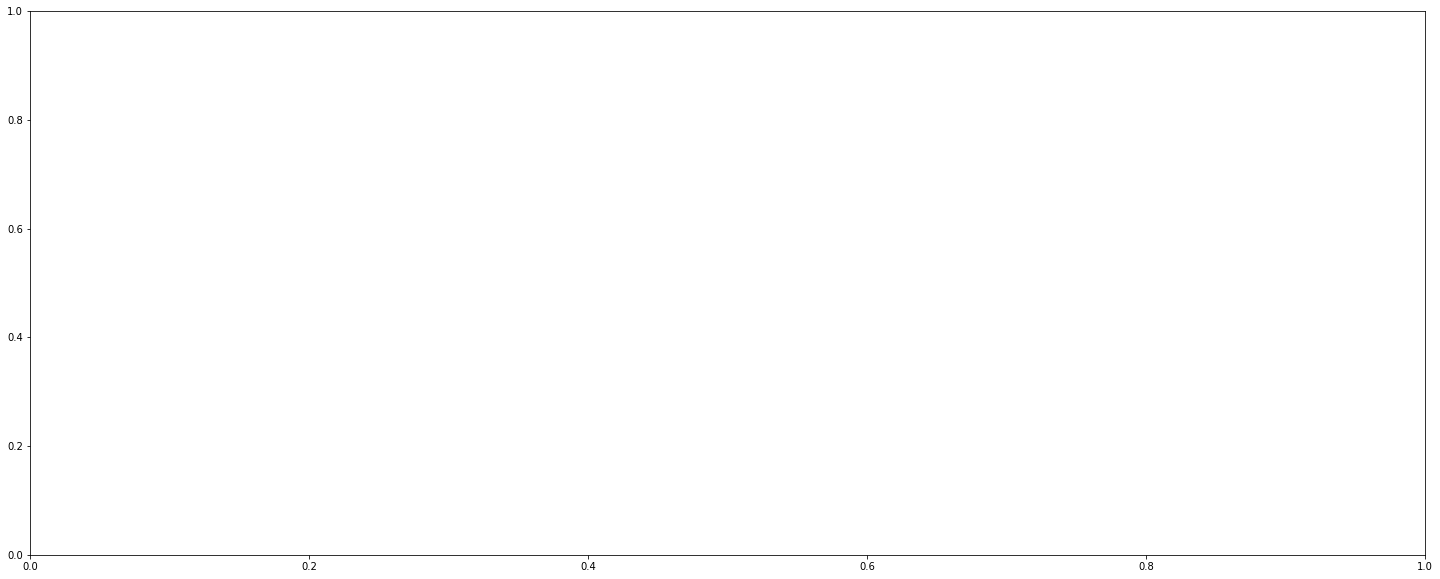

In [55]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(sample_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, sample):
    xs = X_reduced[X['category_name'] == sample].T[0]
    ys = X_reduced[X['category_name'] == sample].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [56]:
#calculating frequency of terms
term_frequencies = []
for j in range(0,sample_counts.shape[1]):
    term_frequencies.append(sum(sample_counts[:,j].toarray()))
    

In [57]:
import numpy as np
term_frequencies = np.asarray(sample_counts.sum(axis=0))[0]
term_frequencies[0]

11

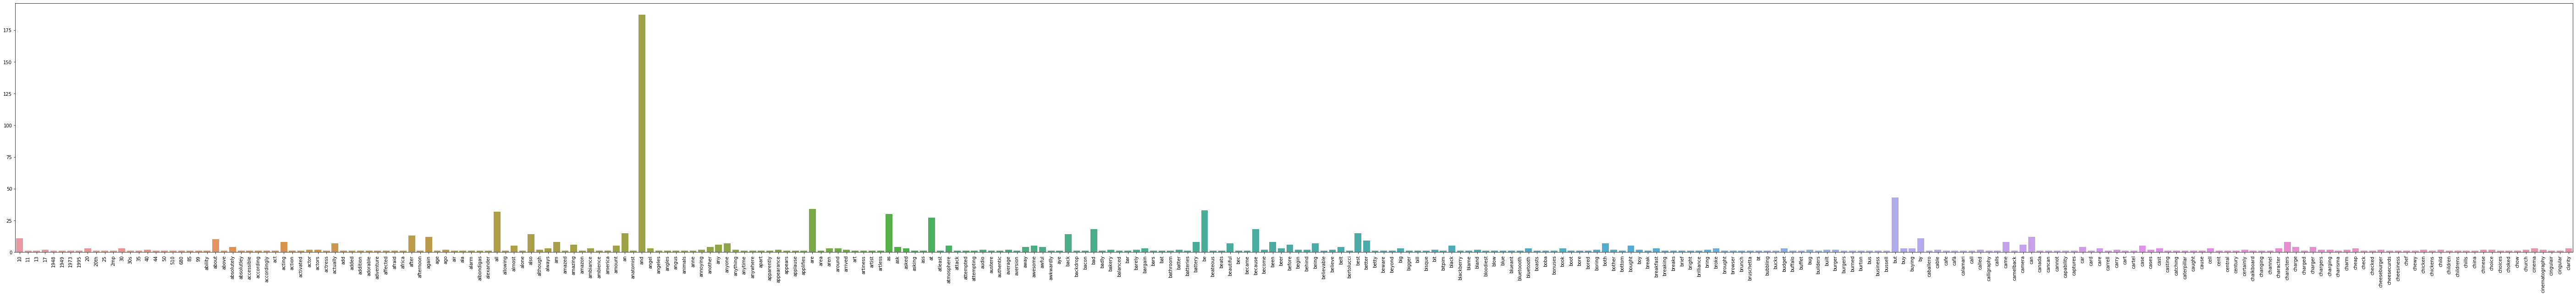

In [58]:
#visualization for term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [59]:
#performing attribute transformation 
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

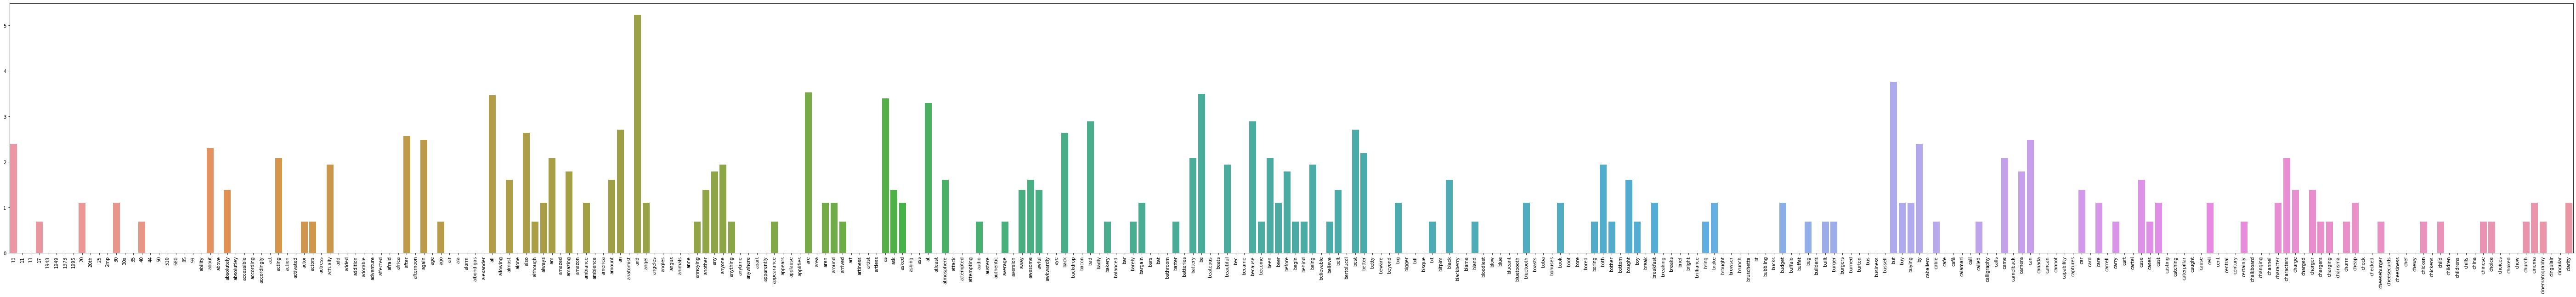

In [60]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [62]:
#computiing label binarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(sample.Sentence)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [85]:
#from sklearn.feature_extraction.text import CountVectorizer

#corpus = ["Sentence.sample"]
#vectorizer = CountVectorizer()
#print( vectorizer.fit_transform(corpus).todense() )
#print( vectorizer.vocabulary_ )

In [82]:
#Creating a corpus of dataframe
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = './'
newcorpus = PlaintextCorpusReader(corpus_root, '.*')
newcorpus.words()

['ref', ':', 'refs', '/', 'heads', '/', 'master', '[', ...]

In [87]:
import nltk 
import re 
import numpy as np 

In [92]:
#Creating a word2vec counter
word2count = {} 
for data in sample: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [93]:
#Finding out the most frequent words
import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

In [94]:
#Building the bag of words model 
X = [] 
for data in sample: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 

In [66]:
#Performing a TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
x = v.fit_transform(result['Sentence'])

In [67]:
df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
print(df1)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


In [95]:
def termFrequency(term, doc):  
      
    # Splitting the document into individual terms 
    normalizeTermFreq = doc.lower().split()  
  
    # Number of times the term occurs in the document 
    term_in_document = normalizeTermFreq.count(term.lower())  
  
    # Total number of terms in the document 
    len_of_document = float(len(normalizeTermFreq ))  
  
    # Normalized Term Frequency 
    normalized_tf = term_in_document / len_of_document  
  
    return normalized_tf 

In [96]:
#calculating the inverse document frequency 
def inverseDocumentFrequency(term, allDocs): 
    num_docs_with_given_term = 0
 
    # Iterate through all the documents 
    for doc in allDocs: 
          

        if term.lower() in allDocs[doc].lower().split(): 
            num_docs_with_given_term += 1
  
    if num_docs_with_given_term > 0: 
        # Total number of documents 
        total_num_docs = len(allDocs)  
  
        # Calculating the IDF  
        idf_val = log(float(total_num_docs) / num_docs_with_given_term) 
        return idf_val 
    else: 
        return 0

In [99]:
#attempting the Naive bayes classifier 
from sklearn.datasets import make_classification
nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [101]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8933333333333333

In [ ]:
#This was a really difficult task for me and ifelt that i have not grasped the necessary concepts needed to complete the lab in its entirety but i tried to go through most of the material. :(